# Downloading and Exploring Snow Today's Snow Data

This tutorial is the first in a series of tutorials intended to walk you through downloading, accessing, processing, and visualizing the National Snow and Ice Data Center's (NSIDC) Snow Today's (https://nsidc.org/reports/snow-today) snow cover and albedo datasets. The tutorials are using 19 year's (2001-2019) worth of snow cover and albedo datasets for the Sierra Nevada Mountain Range. Included in this tutorial are steps to: 

#### **1.** Download snow cover and albedo datasets 

#### **2.** Access snow cover and albedo data/metadata

#### **3.** Create basic visualizations of the datasets

# Table of Contents

 ####  [Download Snow Cover and Albedo Datasets](#bullet1)
 * [Packages](#package1)
 * [Download Sierra Snow Cover Datasets](#bullet2)
 * [Download Albedo Datasets](#bullet3)
 #### [Opening HDF5 Datasets Four Different Ways](#bullet4)
 * [Packages](#package2)
 * [Glob the Datasets](#bullet5)
 * [H5py](#bullet6)
 * [rasterio](#bullet7)
 * [rioxarry](#bullet8)
 * [GDAL (Preferred)](#bullet9)
 #### [Basic Visualizations](#bullet10)
 * [Packages](#package3)
 * [Processing Snow Data](#bullet11)
 * [Processing Albedo Data](#bullet12)
 * [Basic Plots](#bullet13)
 #### [Create Snow Cover GIF](#bullet14)
 * [Packages](#package4)
 * [Snow Cover For Loop](#bullet15)

## Downloading Snow Cover and Albedo Datasets<a class="anchor" id="bullet1"></a>
Snow cover and albedo datasets are stored the Hierarchial Data Format version 5 (HDF5), meaning that datasets are stored with file structure made of groups and datasets. Each dataset is stored as a 3-dimensional matrix, where the first dimension is day of the current water year, x dimension, and y dimension (365, 1334, 1841). Each cell size is 500 meters by 500 meters in size. Water years begin on October-1 of the previous year (e.g., Sierra2001.h5 dataset starts at 2000-10-01). 

### **Note**

This tutorial requires that you download at least the first four datasets the snow cover and albedo datasets for this tutorial. However, the get the full experience of each tutorial in this series, we'd strongly encourage to download all of the snow cover and albedo datasets. 

### Packages <a class="anchor" id="package1"></a> 

 If you have already downloaded the datasets, either manually or using the below code chunks (see "Download Sierra Snow Cover/Albedo Datasets"), feel free to skip ahead to "Opening HDF5 Datasets Four Different Ways".

In [1]:
# Used to download the h5 datasets
import wget

# Useful package to set/create filepaths 
import os

# Used to move datasets to specified folder
import shutil

## Snow Cover<a class="anchor" id="bullet2"></a>

Snow cover percent is areal extent of snow-covered ground, expressed as the mathematical percent of a region covered with snow. Therefore, snow cover, in this context, each cells snow cover percent multiplied by the cell size (500 meters * 500 meters). If you'd like to learn more about how this value is calculated, please visit: https://nsidc.org/reports/snow-today/about .


#### **Note**
To manually download Sierra snow cover datasets, please visit: https://snow.ucsb.edu/products/SPIRES/Sierra/

## Albedo<a class="anchor" id="bullet3"></a>

Albedo is the proportion of the incident light or radiation reflected by a surface--or more simply--is a measure of how reflective a surface is. Fresh, clean snow with a high albedo appears bright, while old or dirty snow tends to have a lower albedo and appears darker. The snow albedo measurement is a non-dimensional, unitless quantity that measures how well a surface reflects solar energy, ranging from 0 to 1. A value of 0 means the surface is a perfect absorber, where all incoming energy is absorbed. In contrast, a value of 1 means the surface is a perfect reflector, where all incoming energy is reflected, and none is absorbed. This quantity can also be expressed as a percent with a range from 0 to 100, with zero percent absorbing all incoming energy and 100 percent reflecting all energy. 

In this context, albedo is only measured for present snow and is given as a percentage of reflectivity in a given cell. If you'd like to learn more about how this value is calculated, please visit: https://nsidc.org/reports/snow-today/about .

#### **Note**
To manually download Sierra albedo datasets, please visit: https://snow.ucsb.edu/products/SPIRES/SierraAlbedo/

To streamline the process of downloading the snow cover and albedo datasets, we've provided a function to automatically download the datasets in the code chunk below. 

Let's go over each of the variables. 

In [2]:
# dataset: choose between 'snow cover' and 'albedo' 

# start_year: choose between 2001 and 2019

# end_year: choose between 2001 and 2019 

# directory: choose where to download the datasets to
# We've already provided two directories 'albedo' and 'snow_cover'

# Note: To gain the full experience of this tutorial series, it is strongly encouraged that you download 2001-2019 of the snow cover dataset and 2001-2019 of the albedo datasets.  

# Now that we know what's what, let's run the function to define it. 

def dataset_download(dataset, start_year, end_year, directory):
    
    for i in range(start_year, end_year + 1):
        
        # Set's the target directory of where files will be downloaded to. 
        target_dir = str(directory) + '/'

        # Depending on your choice 'albedo' or 'snow cover' will define variables accordingly
        filename = dataset 
        
        # Defined variables if 'snow cover' is chosen.  
        if dataset == 'snow cover':

            # For loop through the h5 file name. 
            filename = 'Sierra'+str(i)+'.h5'
            
            # url where datasets live. 
            url = 'https://snow.ucsb.edu/products/SPIRES/Sierra/Sierra'+str(i)+'.h5'

        elif dataset == 'albedo':
            filename = 'SierraAlbedo' + str(i) + '.h5'
            url = 'https://snow.ucsb.edu/products/SPIRES/SierraAlbedo/SierraAlbedo'+str(i)+'.h5'
        
        # Downloads dataset based on url choice. 
        wget.download(url)

        # Moves dataset to specified file path
        # First argument "filename" will override any duplicate datasets in the given directory. 
        # This is done to prevent errors occurring from downloading files that already exist. 
        shutil.move(filename, os.path.join(target_dir, filename))

In [ ]:
# Run this to download snow cover datasets 
# Note: 2001-2019 is about 7gb and can take several minutes to download. 
dataset_download(dataset = 'snow cover', start_year = 2001, end_year = 2019, directory = 'snow_cover')

In [19]:
# Run this to download albedo datasets
# Note: 2001-2019 is about 2gb and can take several minutes to download. 
dataset_download(dataset = 'albedo', start_year = 2001, end_year = 2019, directory = 'albedo')

## Opening HDF5 Datasets Four Different Ways<a class="anchor" id="bullet4"></a>

There are multiple packages that can can help you easily navigate the H5 data structure. Here we'll show you how to use a few: H5py, Rasterio, rioxarray, and GDAL. Each package has their own strengths, but the tutorials will predominately be relying on the GDAL package. 

### **Note**

 While are many Python packages that can open H5 file types--if you'd like to use external software to explore the data/data structure we'd suggest using NASA's Panoply (https://www.giss.nasa.gov/tools/panoply/)(preffered) or HDFGroup's HDFView software (https://www.hdfgroup.org/downloads/hdfview/). 


### Packages <a class="anchor" id="package2"></a> 

In [2]:
# Strings together datasets to be easily callable 
import glob

# Versatile and near essential package for Python computing   
import numpy as np

# Method of opening h5 file type
import h5py

# Method of opening h5 file type 
import rioxarray 

# Method of opening h5 file type
import rasterio 

# Method of opening h5 file type 
# Used in later tutorials for transforming datasets
from osgeo import gdal

### Glob the Datasets<a class="anchor" id="bullet5"></a>

Glob allows us to string together callable dataset names from a specified folder.

In [3]:
# Glob together snow cover datasets
# 'sorted' automatically sort glob results alphabetically by file name
# * equates to zero is more characters, meaning that it will select all files ending with .h5'
snow_cover_ds = sorted(glob.glob('snow_cover/*.h5'))
snow_cover_ds

['snow_cover\\Sierra2001.h5',
 'snow_cover\\Sierra2002.h5',
 'snow_cover\\Sierra2003.h5',
 'snow_cover\\Sierra2004.h5',
 'snow_cover\\Sierra2005.h5',
 'snow_cover\\Sierra2006.h5',
 'snow_cover\\Sierra2007.h5',
 'snow_cover\\Sierra2008.h5',
 'snow_cover\\Sierra2009.h5',
 'snow_cover\\Sierra2010.h5',
 'snow_cover\\Sierra2011.h5',
 'snow_cover\\Sierra2012.h5',
 'snow_cover\\Sierra2013.h5',
 'snow_cover\\Sierra2014.h5',
 'snow_cover\\Sierra2015.h5',
 'snow_cover\\Sierra2016.h5',
 'snow_cover\\Sierra2017.h5',
 'snow_cover\\Sierra2018.h5',
 'snow_cover\\Sierra2019.h5']

In [21]:
# Glob together snow cover datasets
# 'sorted' automatically sort glob results alphabetically by file name
# * equates to zero is more characters, meaning that it will select all files ending with .h5'
albedo_ds = sorted(glob.glob('albedo/*.h5'))
albedo_ds

['albedo\\SierraAlbedo2001.h5',
 'albedo\\SierraAlbedo2002.h5',
 'albedo\\SierraAlbedo2003.h5',
 'albedo\\SierraAlbedo2004.h5',
 'albedo\\SierraAlbedo2005.h5',
 'albedo\\SierraAlbedo2006.h5',
 'albedo\\SierraAlbedo2007.h5',
 'albedo\\SierraAlbedo2008.h5',
 'albedo\\SierraAlbedo2009.h5',
 'albedo\\SierraAlbedo2010.h5',
 'albedo\\SierraAlbedo2011.h5',
 'albedo\\SierraAlbedo2012.h5',
 'albedo\\SierraAlbedo2013.h5',
 'albedo\\SierraAlbedo2014.h5',
 'albedo\\SierraAlbedo2015.h5',
 'albedo\\SierraAlbedo2016.h5',
 'albedo\\SierraAlbedo2017.h5',
 'albedo\\SierraAlbedo2018.h5',
 'albedo\\SierraAlbedo2019.h5']

## Opening Datasets with H5py<a class="anchor" id="bullet6"></a>

https://docs.h5py.org/en/stable/

To start, let's use H5py to look at 'Sierra2001.h5' and 'SierraAlbedo2001.h5'.

In [23]:
# Use H5py to open up the first dataset sorted in the in the glob string 
# 'r' is to specify that we want to "read" the dataset
# snow_cover_ds[0] calls the first dataset in our list ('Sierra2001.h5')
sierra_2001_snow = h5py.File(snow_cover_ds[0], 'r')

# Here we see that the datasets are stored in groups: Grid-->MODIS_GRID_500m-->dataset
# The snow fraction dataset contains processed snow data
sierra_2001_snow.visit(print)

Grid
Grid/MODIS_GRID_500m
Grid/MODIS_GRID_500m/dust
Grid/MODIS_GRID_500m/grain_size
Grid/MODIS_GRID_500m/raw_snow_fraction
Grid/MODIS_GRID_500m/snow_fraction


In [24]:
# Use H5py to open up the first dataset sorted in the in the glob string 
# 'r' is to specify that we want to "read" the dataset
# snow_cover_ds[0] calls the first dataset in our list ('SierraAlbedo2001.h5')
sierra_2001_albedo = h5py.File(albedo_ds[0], 'r')

# Similarly, we see that the albedo datasets are stored in the same structure: Grid-->MODIS_GRID_500m-->dataset
# However, 'albedo' is the only dataset stored.
sierra_2001_albedo.visit(print)

Grid
Grid/MODIS_GRID_500m
Grid/MODIS_GRID_500m/albedo


### Navigate Layers

In [25]:
# Now that we know the dataset structure, we can easily navigate the layers
sierra_2001_snow['Grid']['MODIS_GRID_500m']['snow_fraction']

<HDF5 dataset "snow_fraction": shape (365, 1334, 1841), type "|u1">

In [111]:
# Similarly, we can navigate the albedo dataset
sierra_2001_albedo['Grid']['MODIS_GRID_500m']['albedo']

<HDF5 dataset "albedo": shape (365, 1334, 1841), type "<u2">

Notice how the 'snow_fraction' dataset is type "|u1"> , while the 'albedo' dataset is type type "<u2">. u1 datatype is an 8-bit(1 byte) unsigned integer and its range is 0 to 255, while u2 is a 16-bit(2 bytes) unsigned integer and its range is 0 to 65535. As such, NA values are stored as 255 and 65535 for the snow cover and albedo datasets, respectively. 

Now that we know the structure to our datasets, let's take a look at the metadata stored at each level. 

#### 'Sierra2001' Layer (outermost layer)

Using a for loop, we can print the 'attribute' names and respective values stored. 

In [26]:
# We see that both ISOdates and MATLABdates are stored on outermost level of the dataset. 
for meta in sierra_2001_snow.attrs.keys():
    print(meta)
    print (sierra_2001_snow.attrs[meta])

ISOdates
[2000275. 2000276. 2000277. 2000278. 2000279. 2000280. 2000281. 2000282.
 2000283. 2000284. 2000285. 2000286. 2000287. 2000288. 2000289. 2000290.
 2000291. 2000292. 2000293. 2000294. 2000295. 2000296. 2000297. 2000298.
 2000299. 2000300. 2000301. 2000302. 2000303. 2000304. 2000305. 2000306.
 2000307. 2000308. 2000309. 2000310. 2000311. 2000312. 2000313. 2000314.
 2000315. 2000316. 2000317. 2000318. 2000319. 2000320. 2000321. 2000322.
 2000323. 2000324. 2000325. 2000326. 2000327. 2000328. 2000329. 2000330.
 2000331. 2000332. 2000333. 2000334. 2000335. 2000336. 2000337. 2000338.
 2000339. 2000340. 2000341. 2000342. 2000343. 2000344. 2000345. 2000346.
 2000347. 2000348. 2000349. 2000350. 2000351. 2000352. 2000353. 2000354.
 2000355. 2000356. 2000357. 2000358. 2000359. 2000360. 2000361. 2000362.
 2000363. 2000364. 2000365. 2000366. 2001001. 2001002. 2001003. 2001004.
 2001005. 2001006. 2001007. 2001008. 2001009. 2001010. 2001011. 2001012.
 2001013. 2001014. 2001015. 2001016. 20010

#### 'Grid' Layer

Much of the geospatial projection information is stored at this level, including the map projection type: 'eqaconicstd' or Albers Equal-Area Conic Projection — Standard
For additional info regarding projection info: https://www.mathworks.com/help/map/eqaconicstd.html 

In [113]:
# Note: snow cover and albedo projections are the same 'eqaconicstd'.
for meta in sierra_2001_snow['Grid'].attrs.keys():
    print(meta)
    print (sierra_2001_snow['Grid'].attrs[meta])

angleunits
b'degrees'
aspect
b'normal'
falseeasting
[0.]
falsenorthing
[-4000000.]
geoid
[6.37813700e+06 8.18191908e-02]
maplatlimit
[-90.  90.]
maplonlimit
[-255.   15.]
mapparallels
[34.  40.5]
mapprojection
b'eqaconicstd'
nparallels
[2.]
origin
[   0. -120.    0.]
scalefactor
[1.]
trimlat
[-90.  90.]
trimlon
[-135.  135.]


#### 'MODIS_GRID_500m' layer
Let's see what the information is stored in this level. 

In [27]:
# Note: snow cover and albedo 'ReferencingMatrix' are the same. 
for meta in sierra_2001_snow['Grid']['MODIS_GRID_500m'].attrs.keys():
    print(meta)
    print (sierra_2001_snow['Grid']['MODIS_GRID_500m'].attrs[meta])

ReferencingMatrix
[[ 0.0000e+00  5.0000e+02 -2.8575e+05]
 [-5.0000e+02  0.0000e+00  5.0025e+05]]


The 'Referencingmatrix' or referencing matrix is the georeferenced coordinate space is used to help make sense of the size, orientation, and location of the dataset spatially. 

A referencing matrix, or geotransformation, consists in a set of 6 coefficients: 
* GT(0) x-coordinate of the upper-left corner of the upper-left pixel.
* GT(1) w-e pixel resolution / pixel width.
* GT(2) row rotation (typically zero).
* GT(3) y-coordinate of the upper-left corner of the upper-left pixel.
* GT(4) column rotation (typically zero).
* GT(5) n-s pixel resolution / pixel height (negative value for a north-up image).

In the case of north up images (such as these datasets): 
* GT(2), GT(4) coefficients are zero.
* GT(1), GT(5) is the pixel size.
* GT(0), GT(3) position is the top left corner of the top left pixel of the raster.

For additional information regarding referencing matrices, please visit: https://gdal.org/tutorials/geotransforms_tut.html

Notice how the referencing matrix is stored as:

[[ 0.0000e+00  5.0000e+02 -2.8575e+05]

[-5.0000e+02  0.0000e+00  5.0025e+05]]

Where: 

* **0** is the row rotation,

* **500** is the pixel width,

* **-2.8575e+05** is the x-coordinate of the upper-left corner of the upper-left pixel (UTM position),

* **-500** is the pixel length (negative for north up images),

* **0** is the column rotation, and 

* **5.0025e+05** is the y-coordinate of the upper-left corner of the upper-left pixel (UTM position)

In the second tutorial, ST_02_Snow_Geospatial_Calculations, we will rearrange the referencing matrix in order to transform our dataset to look like:

[[-2.8575e+05 0.0000e+00  5.0000e+02 ]

[5.0025e+05 -5.0000e+02  0.0000e+00 ]]


This will help certain softwares, such as Panoply and QGIS, make sense of projection information. This is also needed to help transform our datasets to geoTIFFs and NetCDF file formats. 


#### 'snow_fraction' layer 

To get the snow cover dataset into their "true" values, we'll need to divide them by the 'divisor'. In this case, dividing by the 'divisor' will result in values 1/100th of the current cell values. 

In [115]:
for meta in sierra_2001_snow['Grid']['MODIS_GRID_500m']['snow_fraction'].attrs.keys():
    print(meta)
    print (sierra_2001_snow['Grid']['MODIS_GRID_500m']['snow_fraction'].attrs[meta])

divisor
[100.]


#### 'albedo' layer

Similar to snow cover, to get the albedo values into their true values, we'll need to divide by the dataset's divisor. However, notice that the divisor for albedo is 10000 instead of 100. Therefore, dividing by the divisor will result in values 1/10000th the current cell values. 

In [116]:
for meta in sierra_2001_albedo['Grid']['MODIS_GRID_500m']['albedo'].attrs.keys():
    print(meta)
    print (sierra_2001_albedo['Grid']['MODIS_GRID_500m']['albedo'].attrs[meta])

divisor
[10000.]


## Opening Datasets with Rasterio<a class="anchor" id="bullet7"></a> 

https://rasterio.readthedocs.io/en/latest/

In [117]:
# Open up Sierra2002.H5
sierra_2002_snow = rasterio.open(snow_cover_ds[1])

# Similar to the H5py example, the '.subdatasets' function gives the path of each dataset
sierra_2002_snow.subdatasets

C:\Users\rmunn\Anaconda3\envs\eds223\lib\site-packages\rasterio\__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


['HDF5:snow_cover\\Sierra2002.h5://Grid/MODIS_GRID_500m/dust',
 'HDF5:snow_cover\\Sierra2002.h5://Grid/MODIS_GRID_500m/grain_size',
 'HDF5:snow_cover\\Sierra2002.h5://Grid/MODIS_GRID_500m/raw_snow_fraction',
 'HDF5:snow_cover\\Sierra2002.h5://Grid/MODIS_GRID_500m/snow_fraction']

In [118]:
# One advantage to using the 'tags()' function is the ability to see all the stored metadata in the file structure, rather than having to navigate to each respective level.  
sierra_2002_snow.tags()

{'Grid_angleunits': 'degrees',
 'Grid_aspect': 'normal',
 'Grid_falseeasting': '0 ',
 'Grid_falsenorthing': '-4000000 ',
 'Grid_geoid': '6378137 0.0818191908426215 ',
 'Grid_maplatlimit': '-90 90 ',
 'Grid_maplonlimit': '-255 15 ',
 'Grid_mapparallels': '34 40.5 ',
 'Grid_mapprojection': 'eqaconicstd',
 'Grid_MODIS_GRID_500m_dust_divisor': '10 ',
 'Grid_MODIS_GRID_500m_grain_size_divisor': '1 ',
 'Grid_MODIS_GRID_500m_raw_snow_fraction_divisor': '100 ',
 'Grid_MODIS_GRID_500m_ReferencingMatrix': '0 500 -285750 -500 0 500250 ',
 'Grid_MODIS_GRID_500m_snow_fraction_divisor': '100 ',
 'Grid_nparallels': '2 ',
 'Grid_origin': '0 -120 0 ',
 'Grid_scalefactor': '1 ',
 'Grid_trimlat': '-90 90 ',
 'Grid_trimlon': '-135 135 ',
 'ISOdates': '2001274 2001275 2001276 2001277 2001278 2001279 2001280 2001281 2001282 2001283 2001284 2001285 2001286 2001287 2001288 2001289 2001290 2001291 2001292 2001293 2001294 2001295 2001296 2001297 2001298 2001299 2001300 2001301 2001302 2001303 2001304 2001305 20

In [119]:
# Notice that the the referencing matrix is output as a string rather than a list of lists. 
# In later tutorials, we'll convert this to help us with later conversions/calculations.
sierra_2002_snow.tags()['Grid_MODIS_GRID_500m_ReferencingMatrix']

'0 500 -285750 -500 0 500250 '

## Opening Datasets with rioxarray <a class="anchor" id="bullet8"></a> 

https://corteva.github.io/rioxarray/stable/

In [120]:
# Selects Sierra2003.h5
# Notice the warning that rioxarray can't read the georeference information stored in the four dataset in its current state.  
sierra_snow_cover_2003 = rioxarray.open_rasterio(snow_cover_ds[2])

C:\Users\rmunn\Anaconda3\envs\eds223\lib\site-packages\rasterio\__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
C:\Users\rmunn\Anaconda3\envs\eds223\lib\site-packages\rasterio\__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
C:\Users\rmunn\Anaconda3\envs\eds223\lib\site-packages\rasterio\__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
C:\Users\rmunn\Anaconda3\envs\eds223\lib\site-packages\rasterio\__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwar

In [121]:
# '.info' is an effective way to preview information stored within the dataset
sierra_snow_cover_2003.info

<bound method Dataset.info of <xarray.Dataset>
Dimensions:                                 (y: 1334, x: 1841, band: 365)
Coordinates:
  * y                                       (y) float64 0.5 1.5 ... 1.334e+03
  * x                                       (x) float64 0.5 1.5 ... 1.84e+03
  * band                                    (band) int32 1 2 3 4 ... 363 364 365
    spatial_ref                             int32 0
Data variables:
    Grid_MODIS_GRID_500m_dust               (band, y, x) uint16 ...
    Grid_MODIS_GRID_500m_grain_size         (band, y, x) uint16 ...
    Grid_MODIS_GRID_500m_raw_snow_fraction  (band, y, x) uint8 ...
    Grid_MODIS_GRID_500m_snow_fraction      (band, y, x) uint8 ...
Attributes: (12/21)
    Grid_angleunits:                                 degrees
    Grid_aspect:                                     normal
    Grid_falseeasting:                               0
    Grid_falsenorthing:                              -4000000
    Grid_geoid:                   

In [122]:
# Provides the dimension of the dataset 
sierra_snow_cover_2003.dims

Frozen({'y': 1334, 'x': 1841, 'band': 365})

In [123]:
# Dataset global attributes
sierra_snow_cover_2003.attrs

{'Grid_angleunits': 'degrees',
 'Grid_aspect': 'normal',
 'Grid_falseeasting': 0,
 'Grid_falsenorthing': -4000000,
 'Grid_geoid': '6378137 0.0818191908426215 ',
 'Grid_maplatlimit': '-90 90 ',
 'Grid_maplonlimit': '-255 15 ',
 'Grid_mapparallels': '34 40.5 ',
 'Grid_mapprojection': 'eqaconicstd',
 'Grid_MODIS_GRID_500m_dust_divisor': 10,
 'Grid_MODIS_GRID_500m_grain_size_divisor': 1,
 'Grid_MODIS_GRID_500m_raw_snow_fraction_divisor': 100,
 'Grid_MODIS_GRID_500m_ReferencingMatrix': '0 500 -285750 -500 0 500250 ',
 'Grid_MODIS_GRID_500m_snow_fraction_divisor': 100,
 'Grid_nparallels': 2,
 'Grid_origin': '0 -120 0 ',
 'Grid_scalefactor': 1,
 'Grid_trimlat': '-90 90 ',
 'Grid_trimlon': '-135 135 ',
 'ISOdates': '2002274 2002275 2002276 2002277 2002278 2002279 2002280 2002281 2002282 2002283 2002284 2002285 2002286 2002287 2002288 2002289 2002290 2002291 2002292 2002293 2002294 2002295 2002296 2002297 2002298 2002299 2002300 2002301 2002302 2002303 2002304 2002305 2002306 2002307 2002308 20

## Opening Datasets with GDAL (Preferred) <a class="anchor" id="bullet9"></a> 
https://gdal.org/

https://gdal.org/api/python.html


Installation of the GDAL package (and relevant dependencies) can be tricky, but there are many online tutorials to help you with the installation process. 

GDAL will be the predominant way of accessing the datasets for the remainder of the tutorials.


In [29]:
# Get subdatasets of first snow fraction dataset ('Sierra2004.h5').
sierra_2004_snow = gdal.Open(snow_cover_ds[3], gdal.GA_ReadOnly).GetSubDatasets()

#(sds[3] is to choose the 4th dataset in the subdirectory (i.e., snow fraction). 
#The second bracket [0] is needed to open the dataset.
snow_fraction_2004 = gdal.Open(sierra_2004_snow[3][0])

#Changes the selected dataset into an array. 
snow_fraction_2004_array = snow_fraction_2004.ReadAsArray()

# Here we see that our dataset is 366 days long, and is comprised of 1334 * 1841 cells (x and y dimensions)
# Note: 2004 was a leap year hence the 366 days. 
np.shape(snow_fraction_2004_array)

(366, 1334, 1841)

In [30]:
# Notice for albedo datasets, '.GetSubDatasets()' nor a secondary 'gdal.Open' is necessary since only a single dataset is stored in the file. 
sierra_2004_albedo = gdal.Open(albedo_ds[3], gdal.GA_ReadOnly)


# Changes the selected dataset into an array.
albedo_2004_array = sierra_2004_albedo.ReadAsArray()

# Similar to snow cover, our dataset is 366 days long and is comprised of 1334 * 1841 cells (x and y dimensions)
np.shape(albedo_2004_array)

(366, 1334, 1841)

#### Access the Metadata

In [126]:
# Pulls out all stored metadata
snow_fraction_2004.GetMetadata()

{'Grid_angleunits': 'degrees',
 'Grid_aspect': 'normal',
 'Grid_falseeasting': '0 ',
 'Grid_falsenorthing': '-4000000 ',
 'Grid_geoid': '6378137 0.0818191908426215 ',
 'Grid_maplatlimit': '-90 90 ',
 'Grid_maplonlimit': '-255 15 ',
 'Grid_mapparallels': '34 40.5 ',
 'Grid_mapprojection': 'eqaconicstd',
 'Grid_MODIS_GRID_500m_ReferencingMatrix': '0 500 -285750 -500 0 500250 ',
 'Grid_nparallels': '2 ',
 'Grid_origin': '0 -120 0 ',
 'Grid_scalefactor': '1 ',
 'Grid_trimlat': '-90 90 ',
 'Grid_trimlon': '-135 135 ',
 'ISOdates': '2003274 2003275 2003276 2003277 2003278 2003279 2003280 2003281 2003282 2003283 2003284 2003285 2003286 2003287 2003288 2003289 2003290 2003291 2003292 2003293 2003294 2003295 2003296 2003297 2003298 2003299 2003300 2003301 2003302 2003303 2003304 2003305 2003306 2003307 2003308 2003309 2003310 2003311 2003312 2003313 2003314 2003315 2003316 2003317 2003318 2003319 2003320 2003321 2003322 2003323 2003324 2003325 2003326 2003327 2003328 2003329 2003330 2003331 200

In [35]:
# To save a metadata variable 
referencing_matrix = snow_fraction_2004.GetMetadata()['Grid_MODIS_GRID_500m_ReferencingMatrix']
referencing_matrix

'0 500 -285750 -500 0 500250 '

# Basic Visualizations <a class="anchor" id="bullet10"></a> 

Now that we can access the data/metadata stored in the datasets, let's create some basic visualizations of our data. 

## Packages <a class="anchor" id="package3"></a> 

In [49]:
from osgeo import gdal
import numpy as np

# Basic plotting package 
import matplotlib.pyplot as plt

## Processing Snow Data <a class="anchor" id="bullet11"></a> 

Most plotting packages require dimensions first then layer or band. As such, we will need to transpose our datasets to put x and y dimensions first then 'days' last. 

In [40]:
# 'np.transpose' flips dimensions of array 
snow_fraction_2004_transposed = np.transpose(snow_fraction_2004_array)
np.shape(snow_fraction_2004_transposed)

(1841, 1334, 366)

In [41]:
# 'np.transpose' also allows you to choose the order of your dimensions
# For example: 
np.shape(np.transpose(snow_fraction_2004_array, (1, 0, 2)))

(1334, 366, 1841)

Now that we've transposed our dataset, we're ready to process our dataset. First, we'll filter out our NA values so that our image only displays valid data. Next, we'll need define and divide by our divisor, which is 255, in this case. Last, we'll need to select a day to display from our dataset (day 200). 

In [61]:
# Convert array to float to remove NA values 
snow_2004_float = snow_fraction_2004_transposed.astype('float')

# Converts all instances of 255 in our dataset with 0 
snow_2004_float[snow_2004_float == 255] = 0 

# Pulls the snow cover divisor from dataset's metadata
snow_divisor = int(gdal.Open(snow_cover_ds[0], gdal.GA_ReadOnly).GetMetadata()['Grid_MODIS_GRID_500m_snow_fraction_divisor'])

# Divide our dataset by the divisor to get data in the correct format. 
snow_2004_float = snow_2004_float / snow_divisor

snow_2004 = np.array(snow_2004_float)

# Here, we're subsetting the 200th layer in our dataset
snow_2004_day_200 = snow_2004[:,:,199]

# To demonstrate what the layer would look like with NA values, let's also subset day 200 of 'snow_fraction_2004_transposed' divided by our divisor 
snow_fraction_2004_transposed = snow_fraction_2004_transposed.astype('float')

snow_2004_day_200_na = (snow_fraction_2004_transposed[:,:,199]/ snow_divisor)

# Confirm shape is now 2-dimensional 
np.shape(snow_2004_day_200)

(1841, 1334)

## Processing Albedo Data <a class="anchor" id="bullet12"></a> 


In [56]:
# As we did with snow cover, we need to transpose our data
albedo_2004_transposed = np.transpose(albedo_2004_array)
np.shape(albedo_2004_transposed)

(1841, 1334, 366)

As we saw above, the albedo divisor is not easily callable from the metadata. So for simplicity, we'll explicitly define the divisor (10000). 

In [62]:
# Convert array to float to remove na values 
albedo_2004_float = albedo_2004_transposed.astype('float')
albedo_2004_float[albedo_2004_float == 65535] = 0

albedo_divisor = 10000

# Recall that the divisor for albedo is 10000. To convert the cell values into a scale of 0 to 1, we need to divide by the divisor. 
albedo_2004_float = albedo_2004_float/albedo_divisor

albedo_2004 = np.array(albedo_2004_float)

# Subset the 200th day from water year 2004
albedo_2004_day_200 = albedo_2004[:,:,200]

## Basic Plots<a class="anchor" id="bullet13"></a> 

Now that we've processed the datasets, let's see how they look starting with snow cover figure with na values. 

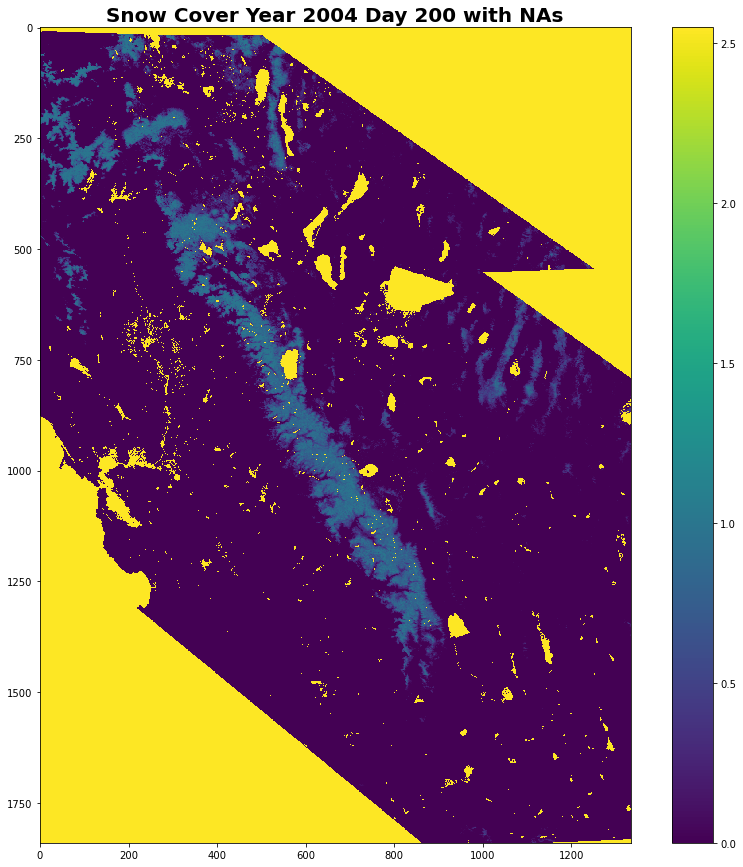

In [64]:
# Plotting with NA values helps contextualize the snow extent across the Sierras. 
# Close to 1000 on the y axis is the San Francisco Bay. Extending east from the San Francisco Bay, the yellow blob with a purple dot in the middle is Mono Lake in Eastern Sierra Nevada. 
# However, we also see that keeping NA values makes our scale confusing and hard to read (2.5 suggests thats a cell is covered in 2.5 x 100%, or 250% of snow cover, which is a nonsensical value). 

plt.figure(figsize=(15, 15))
plt.imshow(snow_2004_day_200_na, interpolation = 'nearest')
plt.title('Snow Cover Year 2004 Day 200 with NAs', fontsize = 20, fontweight='bold')
plt.colorbar()

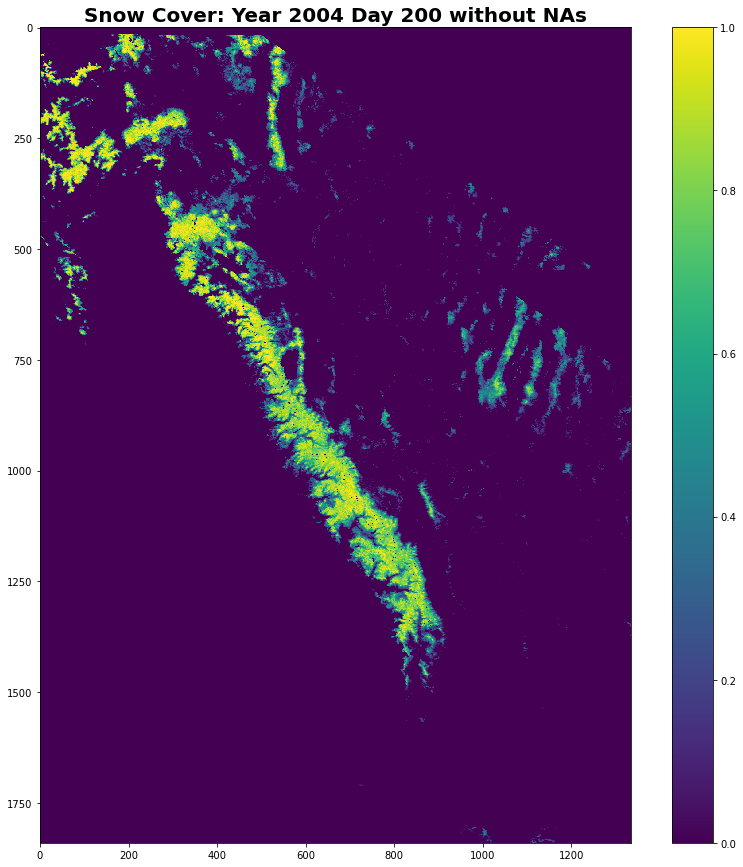

In [65]:
# Here is the same image as the one above, but with NA values subsetted to 0. 
# While we lose context of exactly where snow is in the Sierras, the image is a lot cleaner and the scale is much more readable. 
# This will become important in the next tutorial where we convert our arrays to geoTIFFs for plotting on basemaps. 
plt.figure(figsize=(15, 15))
plt.imshow(snow_2004_day_200, interpolation = 'nearest')
plt.title('Snow Cover: Year 2004 Day 200 without NAs', fontsize = 20, fontweight='bold')
plt.colorbar()

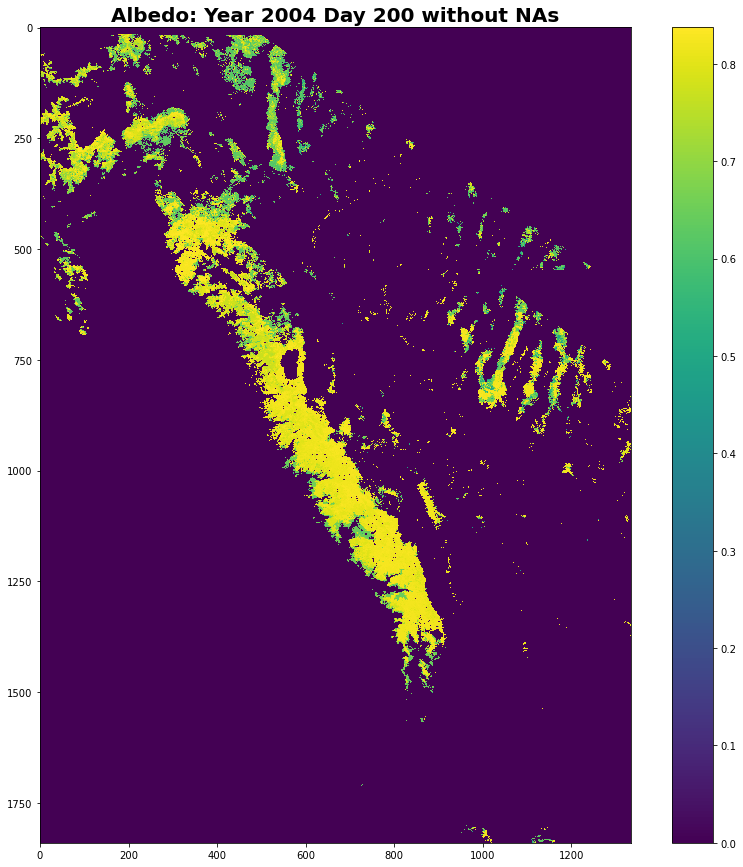

In [66]:
# Here is the albedo values plotted over the same extent as snow cover. 
# Notice that the values are generally much higher than with snow cover and have more defined edges. 
plt.figure(figsize=(15, 15))
plt.imshow(albedo_2004_day_200, interpolation = 'nearest')
plt.title('Albedo: Year 2004 Day 200 without NAs', fontsize = 20, fontweight='bold')
plt.colorbar()

# Create a Snow Cover GIF<a class="anchor" id="bullet14"></a> 

Now that we've successfully plotted snow cover and albedo layers, let's create a GIF of snow cover for an entire water year. 

## Packages <a class="anchor" id="package4"></a> 

In [59]:
import os

# Package used to make GIF 
import imageio

## Snow Cover GIF <a class="anchor" id="bullet15"></a> 

Here, we'll make an image of a each day in one our dataset, then splice the images together into GIF. 

In [68]:
# Create an empty list.
filenames = []

# We take the range of the snow fraction array instead of the transposed dataset since the first dimension in the array is days (i.e., for loop from 0 to 364).
for i in range(len(snow_fraction_2004_array)):
    
    # 3rd dimension is days. 
    days = snow_2004[:,:,i] 
    
    plt.figure(figsize=(15, 15))
    plt.imshow(days, interpolation = 'nearest')
    plt.title('Sierra 2004 Snow Cover Day: ' + str(i), fontsize = 20, fontweight='bold')
        
    # Create a temporary image for each day
    filename = f'{i}.png'
    filenames.append(filename)
        
    # save each day as a frame
    plt.savefig(filename)
    plt.close()
        
# Name the GIF
with imageio.get_writer('2004 Sierra Snow.gif', mode='I') as writer:
    for filename in filenames:
            image = imageio.imread(filename)
            writer.append_data(image)
    for filename in set(filenames):
        os.remove(filename)

## What's Next 

In the next tutorial (ST_02_Snow_Geospatial_Calculations), we'll be processing, subsetting, and converting datasets into GeoTIFFs and NetCDF formats.


For additional information regarding how snow and albedo datasets were created, please visit: https://nsidc.org/reports/snow-today